In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve
import itertools

In [39]:
data = pd.read_csv('./creditcard.csv')

In [40]:
print(data.isnull().sum())
print(data.info())
print(data.describe())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null fl

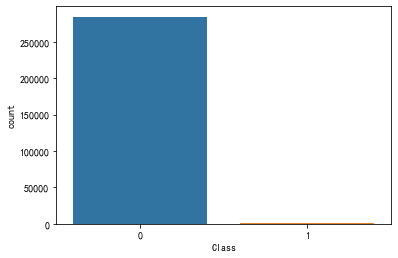

In [41]:
sns.countplot(x='Class',data=data)

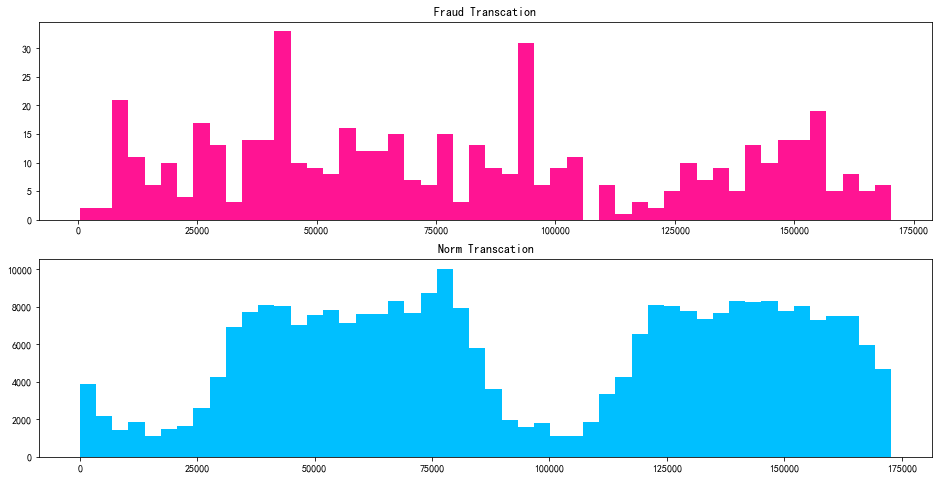

In [42]:
#正常交易和欺诈交易的时间分布
f,(ax1, ax2) = plt.subplots(2,1,figsize=(16,8))
ax1.hist(data.Time[data.Class == 1], bins=50, color='deeppink')
ax1.set_title('Fraud Transcation')
ax2.hist(data.Time[data.Class == 0], bins=50, color='deepskyblue')
ax2.set_title('Norm Transcation')
plt.show()

In [43]:
y = data.pop('Class')
X = data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1)
scaler = StandardScaler()
train_x_scaler = scaler.fit_transform(train_x)
test_x_scaler = scaler.transform(test_x)

In [97]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    #plt.imshow(cm, interpolation = 'bilinear', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 verticalalignment='center',
                 fontsize=12,
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [47]:
# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('准确率')
    plt.title('准确率-召回率 曲线')
    plt.show();


In [109]:
model = LogisticRegression(class_weight = 'balanced')
model.fit(train_x_scaler, train_y)
predict_y = model.predict(test_x_scaler)

In [101]:
LogisticRegression?

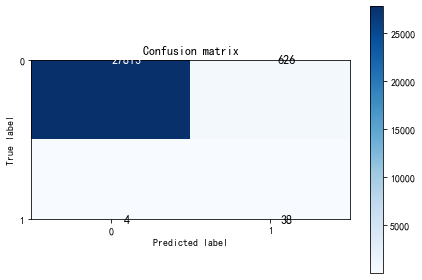

In [110]:
cm = confusion_matrix(test_y, predict_y)
class_name = [0,1]
plot_confusion_matrix(cm, classes=class_name,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues)

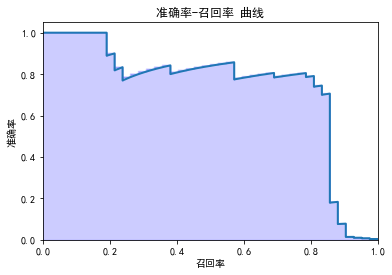

In [111]:
y_score = model.decision_function(test_x_scaler)
precision, recall, thresholds = precision_recall_curve(test_y, y_score)
plot_precision_recall()

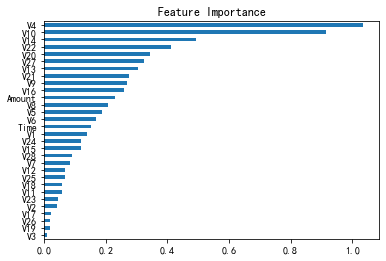

In [60]:
coeffs = model.coef_
df_co = pd.DataFrame(np.transpose(abs(coeffs)), columns=["coef_"])
# 下标设置为Feature Name
df_co.index = data.columns
df_co.sort_values("coef_", ascending=True, inplace=True)
df_co.coef_.plot(kind="barh")
plt.title("Feature Importance")
plt.show()
